In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
# Generate a synthetic dataset with 2 features and 2 classes
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2,
                           n_redundant=0, random_state=40)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

In [17]:
# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


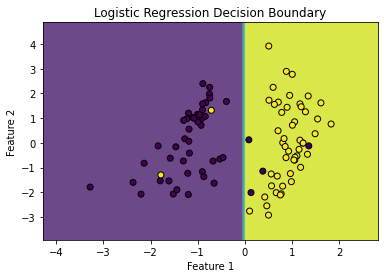

In [16]:
# Create a mesh grid to plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict over the grid to get decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [18]:
# Step 1: Estimate class priors P(y)
prior_y1 = np.mean(y_train)
prior_y0 = 1 - prior_y1


# Step 2: Fit a multivariate normal distribution to each class for P(x | y)
X_train_y1 = X_train[y_train == 1]
X_train_y0 = X_train[y_train == 0]


# Calculate mean and covariance for each class
mean_y1 = np.mean(X_train_y1, axis=0)
cov_y1 = np.cov(X_train_y1, rowvar=False)


mean_y0 = np.mean(X_train_y0, axis=0)
cov_y0 = np.cov(X_train_y0, rowvar=False)


# Step 3: Define a function to compute P(x | y) using multivariate normal distribution
def P_x_given_y(x, mean, cov):
   return multivariate_normal.pdf(x, mean=mean, cov=cov)


# Step 4: Define a function to compute the posterior probability P(y | x) using Bayes' Theorem
def posterior_prob(x, prior_y, mean_y, cov_y):
   P_x_given_y_val = P_x_given_y(x, mean_y, cov_y)
   return P_x_given_y_val * prior_y


# Step 5: Classify a new point using Bayes Classifier
def bayes_classifier(x):
   # Compute posterior probabilities for y=1 and y=0
   posterior_y1 = posterior_prob(x, prior_y1, mean_y1, cov_y1)
   posterior_y0 = posterior_prob(x, prior_y0, mean_y0, cov_y0)


   # Normalize the probabilities by P(x) (marginal likelihood)
   P_x = posterior_y1 + posterior_y0
   P_y1_given_x = posterior_y1 / P_x
   P_y0_given_x = posterior_y0 / P_x


   # Classify based on which posterior is higher
   if P_y1_given_x > P_y0_given_x:
       return 1
   else:
       return 0


# Step 6: Make predictions on the test set
y_pred = np.array([bayes_classifier(x) for x in X_test])


# Step 7: Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Bayes Classifier Accuracy: {accuracy:.2f}")


Bayes Classifier Accuracy: 1.00


/tmp/ipykernel_53332/1245665099.py:27: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_points, marker='x', edgecolors='k', s=50, label='Test Data')


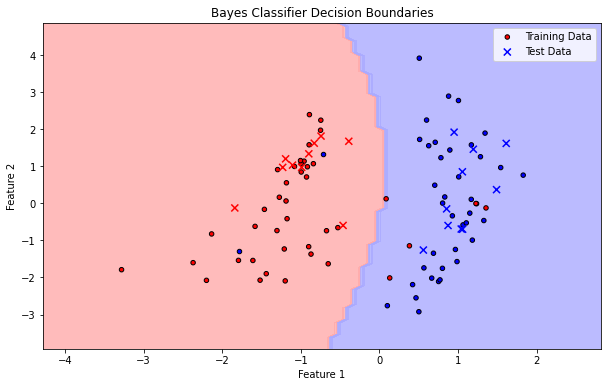

In [20]:
# Generate a grid of points over the range of X_train
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Classify each point in the meshgrid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([bayes_classifier(point) for point in grid_points])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Colors for the background
cmap_points = ListedColormap(['#FF0000', '#0000FF'])  # Colors for the points

plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolors='k', s=20, label='Training Data')

# Plot the test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_points, marker='x', edgecolors='k', s=50, label='Test Data')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Bayes Classifier Decision Boundaries')
plt.legend()
plt.show()
